In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import *

import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.rcdefaults()

In [15]:
DATA_FOLDER = "../Data/"
actors_load = pd.read_csv(
    DATA_FOLDER + "actors.csv",
    converters={
        "fbID":parse_list_actors,
        "ageAtMovieRelease": parse_dict,
        "category": parse_dict,
        "winner": parse_dict,
    },
)
movies_load = pd.read_csv(
    DATA_FOLDER + "movies.csv",
    converters={
        "languages": parse_list,
        "countries": parse_list,
        "genres": parse_list
    },
)

In [16]:
movies = movies_load.copy()
actors = actors_load.copy()

In [17]:
actors_exploded= explode_on_movies(actors)

In [105]:
actors_exploded.ageAtMovieRelease.isnull().sum()/len(actors_exploded)

0.4250998452203091

In [106]:
merged_actors_genres = actors_exploded.merge(movies[["fbID", "genres"]], how="left", on="fbID")

In [113]:
rem = merged_actors_genres.explode("genres").reset_index()

In [127]:
pos_age = rem.ageAtMovieRelease > 0

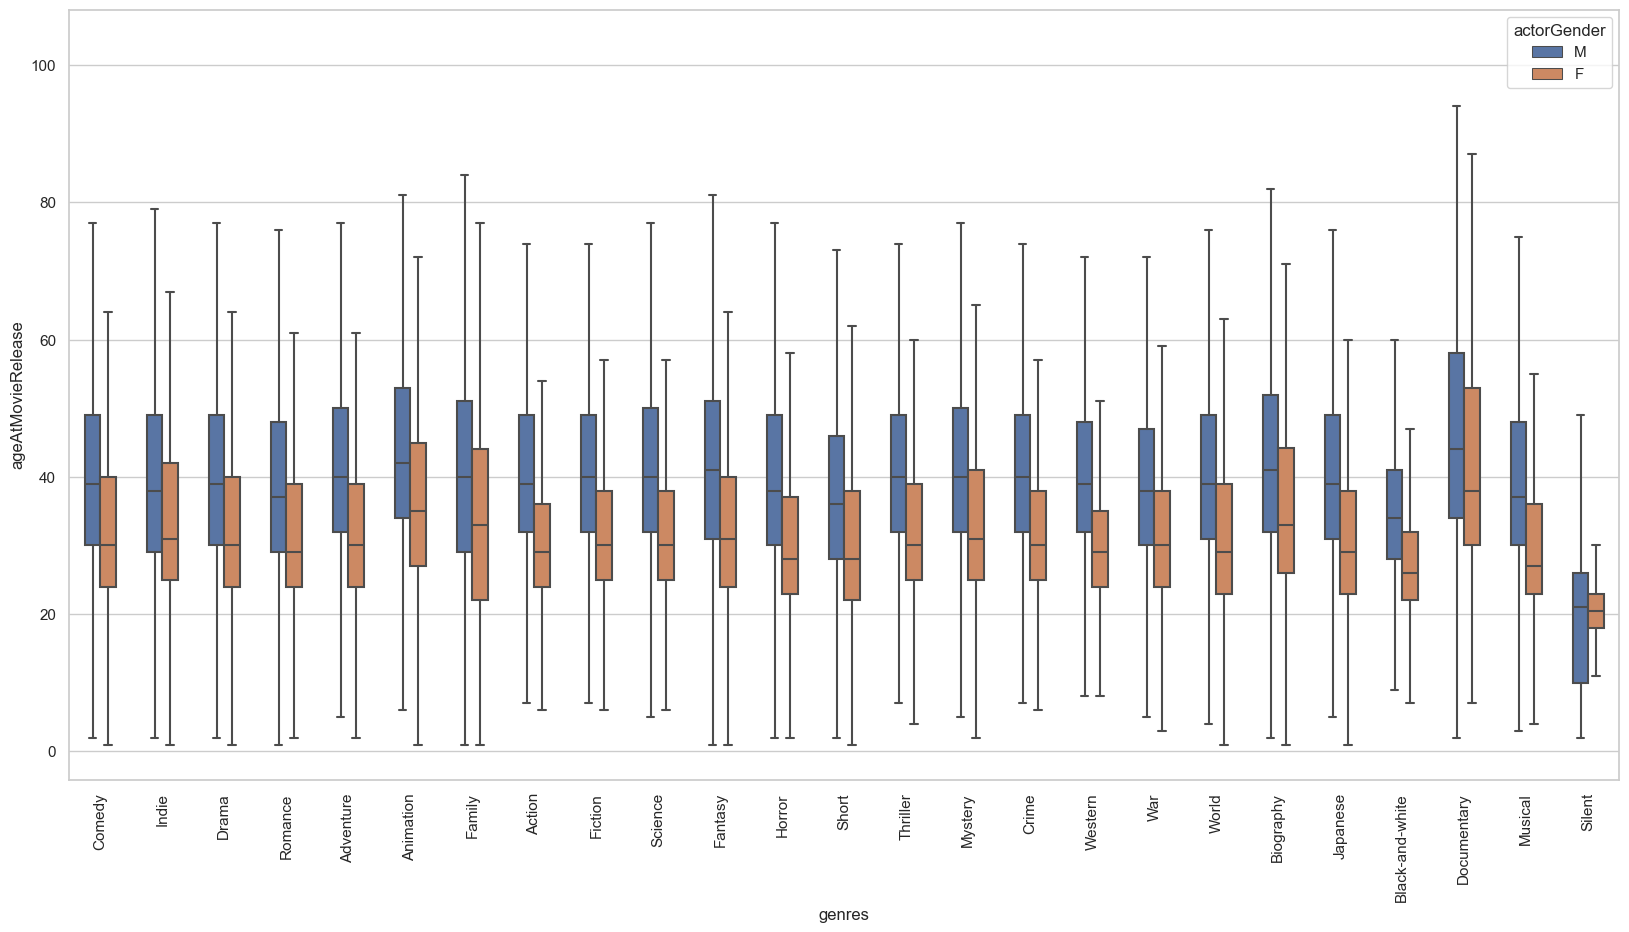

In [137]:
plt.figure(figsize=(20,10))
sns.boxplot(
    data=rem[pos_age],
    x="genres",
    y="ageAtMovieRelease",
    hue="actorGender",
    fliersize=0,
    width=0.5
)
plt.xticks(rotation=90);


# sns.pointplot(
#     data=rem[pos_age],
#     x="ageAtMovieRelease",
#     y="genres",
#     hue="actorGender",
#     dodge=0.8 - 0.8 / 3,
#     palette="dark",
#     errorbar=None,
#     markers="d",
#     linestyle="none",
# )

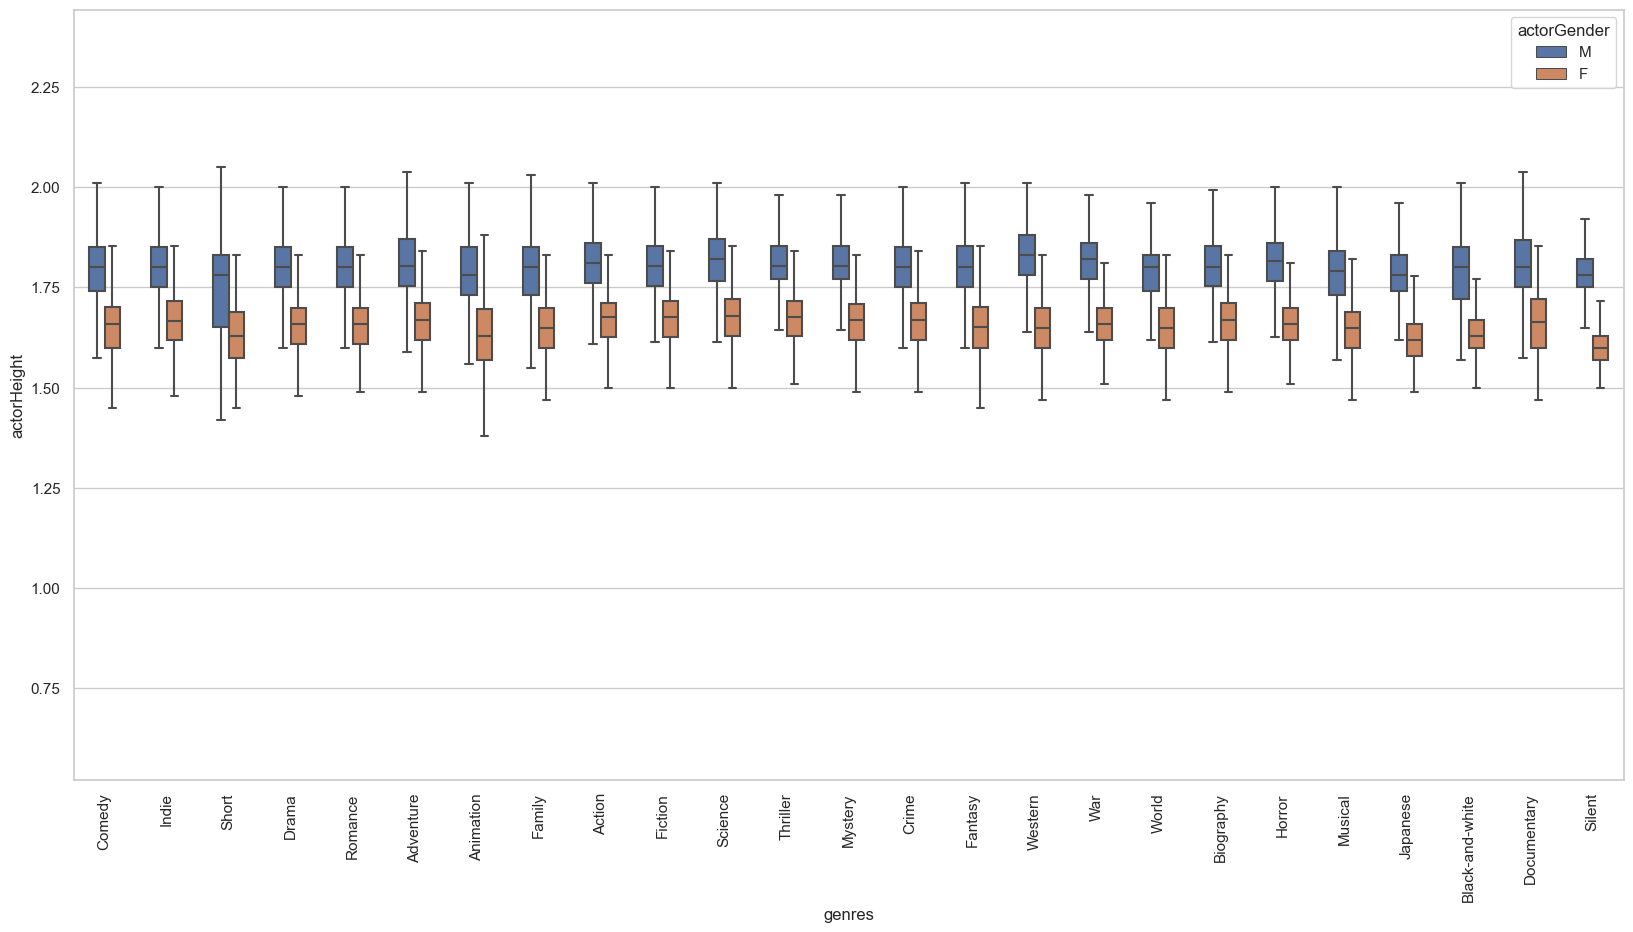

In [216]:
plt.figure(figsize=(20,10))
sns.boxplot(
    data=rem[rem["actorHeight"]<3],
    x="genres",
    y="actorHeight",
    hue="actorGender",
    fliersize=0,
    width=0.5
)
plt.xticks(rotation=90);

In [142]:
actors_exploded[actors_exploded["actorGender"] == "M"].ageAtMovieRelease

0         44.0
0          NaN
0         35.0
0         33.0
0          NaN
          ... 
135758    46.0
135758    42.0
135758    40.0
135758    32.0
135759    49.0
Name: ageAtMovieRelease, Length: 267822, dtype: float64

In [144]:
actors_exploded[actors_exploded["actorGender"] == "F"].ageAtMovieRelease

2         25.0
7         39.0
8         52.0
8         52.0
8         52.0
          ... 
135743     NaN
135743    58.0
135743    52.0
135744    22.0
135744    21.0
Name: ageAtMovieRelease, Length: 133866, dtype: float64

In [212]:
import scipy

scipy.stats.ttest_ind(
    actors_exploded[actors_exploded["actorGender"] == "M"].ageAtMovieRelease.dropna(),
    actors_exploded[actors_exploded["actorGender"] == "F"].ageAtMovieRelease.dropna(),
    alternative="less"
)

TtestResult(statistic=85.23360904286474, pvalue=1.0, df=254900.0)

In [ ]:
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.0f%%')

In [19]:
genres_list = movies["genres"].explode().dropna().value_counts().index.to_list()
genres_list

['Drama',
 'Comedy',
 'Romance',
 'Action',
 'Fiction',
 'Thriller',
 'Adventure',
 'Crime',
 'Black-and-white',
 'Short',
 'World',
 'Indie',
 'Family',
 'Documentary',
 'Horror',
 'Silent',
 'Musical',
 'Animation',
 'Mystery',
 'Fantasy',
 'Science',
 'War',
 'Western',
 'Japanese',
 'Biography']

In [168]:
# Merge actors_genres with movies dataset, explode the genres column
merged_actors_genres = actors_exploded.merge(movies[["fbID", "genres"]], how="left", on="fbID")
exploded_actors_genres = merged_actors_genres[["fbActorID", "genres"]].explode(column="genres")

# Create dummy variables for genres and group and sum 
genre_dummies = pd.get_dummies(exploded_actors_genres, columns=["genres"], prefix="", prefix_sep="")
genre_dummies["moviesCounts"] = genre_dummies[genres_list].sum(axis="columns") #### FAUX!!!!
grouped_genre_dummies = (1 * genre_dummies).groupby("fbActorID").sum()
# Filter actors with at least 100 genresCounts
filtered_genre_dummies = grouped_genre_dummies.query("moviesCounts >= 200")

# Normalize again after filtering
final_genre_dummies = filtered_genre_dummies.div(filtered_genre_dummies["moviesCounts"], axis=0)

# Group by fbActorID and sum again
final_grouped_genre_dummies = final_genre_dummies.groupby("fbActorID").sum()

In [21]:
test = final_grouped_genre_dummies.merge(actors[["fbActorID","actorGender"]],how="left", on="fbActorID")

In [80]:
test.actorGender.value_counts()

actorGender
M    168
F     19
Name: count, dtype: int64

In [213]:
actors

,fbActorID,actorName,actorGender,actorDOB,actorHeight,actorEthnicity,fbID,ageAtMovieRelease,category,winner,numMovies
0,/m/010p3,Adam Carolla,M,1964-05-27,1.880,/m/0xnvg,"[/m/03qk61v, /m/047dv64, /m/051wrdv, /m/06c5z_...","{'/m/03qk61v': 44.0, '/m/051wrdv': 35.0, '/m/0...",NaN,NaN,11
1,/m/010q36,Fred Rogers,M,1928-03-20,NaN,NaN,[/m/033pf1],{'/m/033pf1': 67.0},NaN,NaN,1
2,/m/010wx,Aria Giovanni,F,1977-11-03,1.680,/m/03q819,[/m/07gx0c],{'/m/07gx0c': 25.0},NaN,NaN,1
3,/m/010xjr,Richard Harris,M,1930-10-01,1.850,/m/03bkbh,"[/m/015gl2, /m/0273r02, /m/02qf1bq, /m/02qf7sl...","{'/m/0273r02': 68.0, '/m/02qf1bq': 36.0, '/m/0...",{'/m/015gl2': 'ACTOR'},{'/m/015gl2': False},52
4,/m/0112yl,Toshiro Mifune,M,1920-04-01,1.740,NaN,"[/m/018lr7, /m/019npw, /m/01j5x_, /m/01nv95, /...","{'/m/018lr7': 41.0, '/m/019npw': 30.0, '/m/01n...",NaN,NaN,48
...,...,...,...,...,...,...,...,...,...,...,...
135755,/m/0z58,Ardal O'Hanlon,M,1965-10-08,NaN,NaN,[/m/027cvd8],NaN,NaN,NaN,1
135756,/m/0z9q0,"José Luis Rodríguez ""El Puma""",M,1943-01-14,NaN,NaN,[/m/0gls5qd],{'/m/0gls5qd': 69.0},NaN,NaN,1
135757,/m/0zcb7,Marcus Giamatti,M,1961-10-03,1.850,NaN,"[/m/02drs7, /m/03b1xl, /m/047fs6w, /m/080kkcx,...","{'/m/02drs7': 40.0, '/m/03b1xl': 29.0, '/m/047...",NaN,NaN,6
135758,/m/0zcbl,Paul Giamatti,M,1967-06-06,1.740,/m/033tf_,"[/m/01510v, /m/01hv3t, /m/01pgnr, /m/024tb7, /...","{'/m/01510v': 31.0, '/m/01hv3t': 30.0, '/m/01p...",{'/m/050gkf': 'ACTOR IN A SUPPORTING ROLE'},{'/m/050gkf': False},54


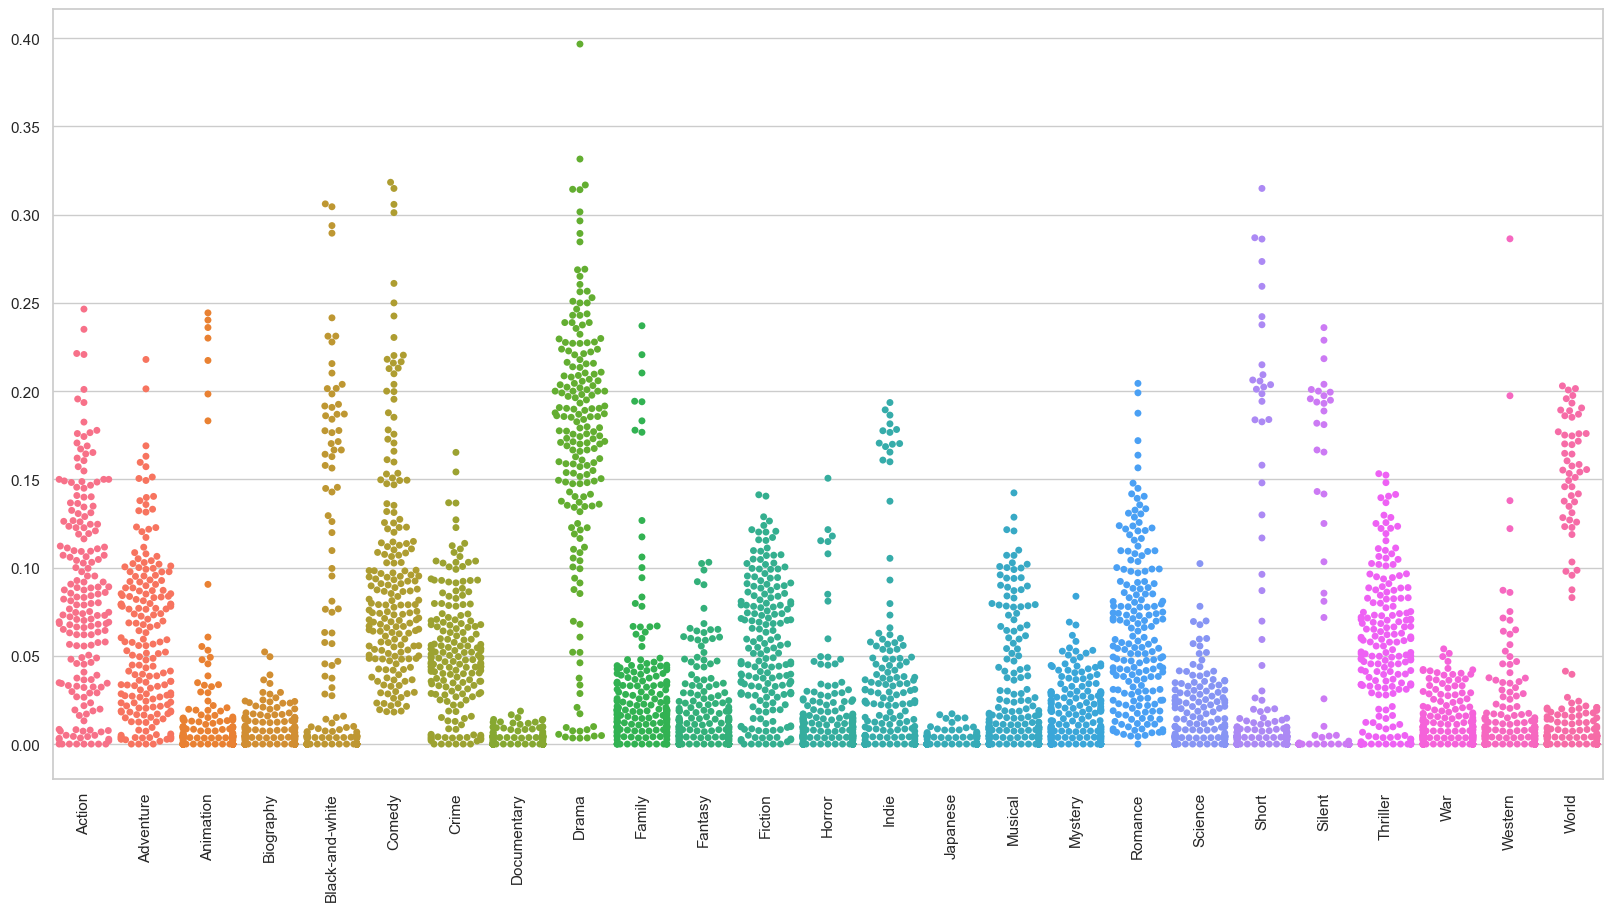

In [26]:
plt.figure(figsize=(20,10))
sns.swarmplot(data=test.drop(columns="moviesCounts"), )
plt.xticks(rotation=90);

In [149]:
actors['numMovies'] = actors['fbID'].apply(lambda x: len(x))
actors_ex = explode_on_movies(actors)
merged_actors_genres = actors_ex.merge(movies[["fbID", "genres"]], how="left", on="fbID")

genres_exploded= merged_actors_genres.explode("genres")

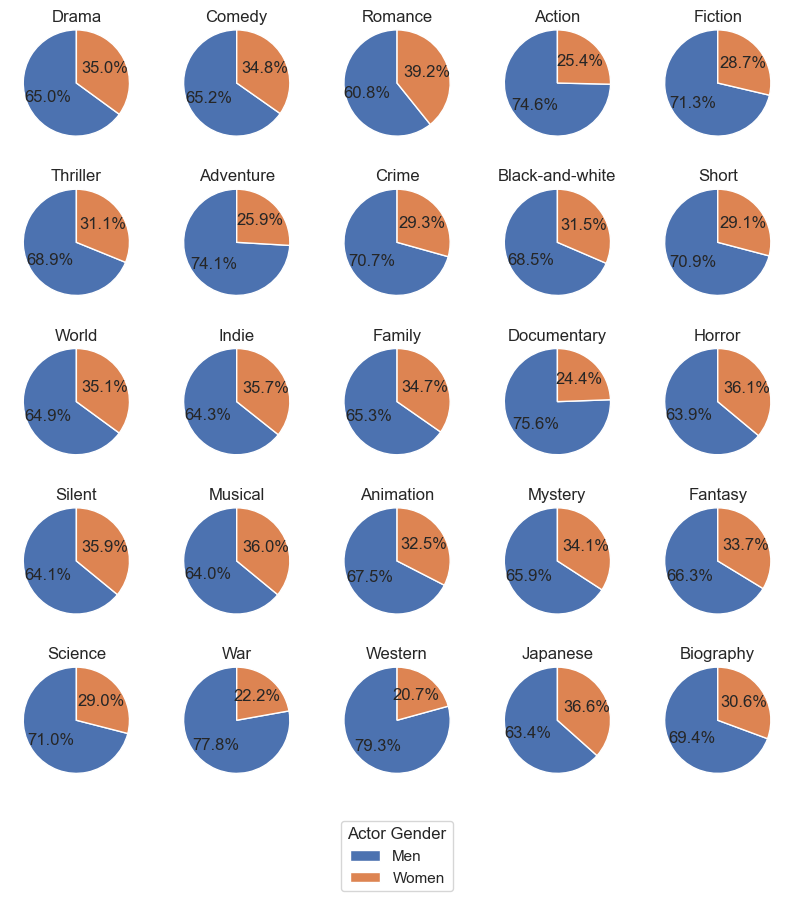

In [202]:
actors['numMovies'] = actors['fbID'].apply(lambda x: len(x))
actors_ex = explode_on_movies(actors)
merged_actors_genres = actors_ex.merge(movies[["fbID", "genres"]], how="left", on="fbID")

genres_exploded= merged_actors_genres.explode("genres")

fig, axes = plt.subplots(5,5, figsize=(10,10))
for genre, ax in zip(genres_list, axes.ravel()):
    genders = genres_exploded[genres_exploded["genres"] == genre]["actorGender"].value_counts()
    patches, text, _ = ax.pie(genders, startangle=90, autopct='%1.1f%%')
    ax.set_title(genre, y=0.9)

fig.legend(patches, labels=["Men", "Women"], title="Actor Gender",loc='lower center')

<Axes: xlabel='count', ylabel='genres'>

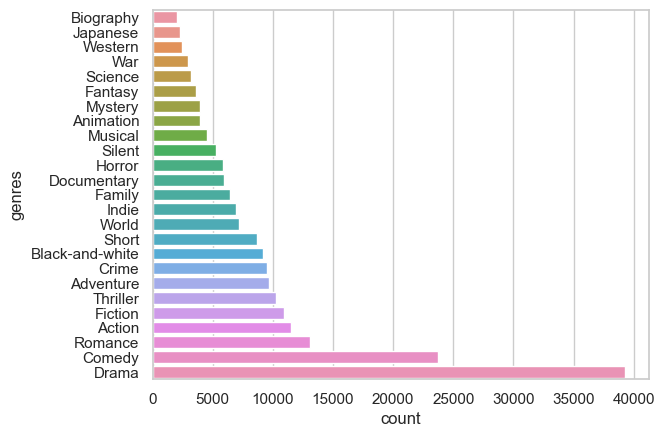

In [87]:
sns.countplot(data=movies.explode("genres"),y="genres" , order = movies["genres"].explode().value_counts().index[::-1])

In [209]:
# # Merge actors_genres with movies dataset, explode the genres column
# merged_actors_genres = actors_exploded.merge(movies[["fbID", "genres"]], how="left", on="fbID")
# exploded_actors_genres = merged_actors_genres[["fbActorID", "fbID", "genres"]].explode(column="genres")

# # Create dummy variables for genres and group and sum 
# genre_dummies = pd.get_dummies(exploded_actors_genres, columns=["genres"], prefix="", prefix_sep="")
# grouped_genre_dummies = (1 * genre_dummies).groupby(["fbActorID", "fbID"]).sum()

# # Calculate the sum of genres for each actor and movie
# grouped_genre_dummies["genresCounts"] = grouped_genre_dummies[genres_list].sum(axis="columns")

# # Normalize by dividing by the total count of genres
# normalized_genre_dummies = grouped_genre_dummies.div(grouped_genre_dummies["genresCounts"], axis=0)

# # Group by fbActorID and sum again
# grouped_normalized_genre_dummies = normalized_genre_dummies.groupby("fbActorID").sum()

# # Filter actors with at least 100 genresCounts
# filtered_genre_dummies = grouped_normalized_genre_dummies.query("genresCounts >= 50")

# # Normalize again after filtering
# final_genre_dummies = filtered_genre_dummies.div(filtered_genre_dummies["genresCounts"], axis=0)

# # Group by fbActorID and sum again
# final_grouped_genre_dummies = final_genre_dummies.groupby("fbActorID").sum()


<Axes: >

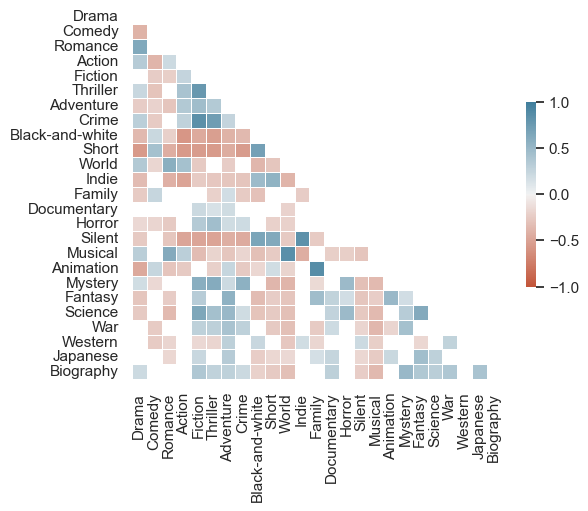

In [207]:
import scipy

pvalues = np.zeros((len(genres_list), len(genres_list))) 
cor = np.zeros((len(genres_list), len(genres_list))) 
for i ,g in  enumerate(genres_list):
    for j, f in enumerate(genres_list):
        pvalues[i,j]= scipy.stats.pearsonr(final_grouped_genre_dummies[g], final_grouped_genre_dummies[f])[1]
        cor[i,j]= scipy.stats.pearsonr(final_grouped_genre_dummies[g], final_grouped_genre_dummies[f])[0]

cmap = sns.diverging_palette(230, 20, as_cmap=True)

from matplotlib import colors 

# Create a diverging color map
divnorm = colors.TwoSlopeNorm(vmin=-abs(cor.max(axis=(0,1))), vcenter=0, vmax=abs(cor.max(axis=(0,1))))
divnorm_ = colors.TwoSlopeNorm(vmin=0, vcenter=0.05, vmax=0.1)

mask = np.triu(np.ones_like(cor, dtype=bool))
mask = mask + (pvalues>0.05)*1

plt.grid(False)
sns.heatmap(
    cor,
    yticklabels=genres_list,
    xticklabels=genres_list,
    cmap=cmap.reversed() ,
    norm=divnorm,
    square=True,
    mask=mask,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

In [36]:
final_grouped_genre_dummies.to_numpy()

array([[6.30036630e-02, 9.60164835e-02, 0.00000000e+00, ...,
        7.67857143e-02, 0.00000000e+00, 1.00000000e+00],
       [4.99149660e-02, 3.26700680e-02, 0.00000000e+00, ...,
        5.68027211e-02, 0.00000000e+00, 1.00000000e+00],
       [7.05128205e-03, 1.73076923e-02, 0.00000000e+00, ...,
        3.84615385e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [8.33333333e-02, 4.03611377e-02, 2.68456376e-04, ...,
        0.00000000e+00, 2.21875999e-01, 1.00000000e+00],
       [6.58468516e-02, 4.93633351e-02, 2.79085993e-03, ...,
        4.94505495e-03, 1.58730159e-02, 1.00000000e+00],
       [5.24542125e-02, 4.55311355e-02, 0.00000000e+00, ...,
        6.15384615e-03, 8.71794872e-03, 1.00000000e+00]])

In [184]:
final_grouped_genre_dummies.drop(columns=["genresCounts"]).mean(axis="index").plot(kind="barh");

KeyError: "['genresCounts'] not found in axis"

In [38]:
data = movies[["releaseYear","genres"]].explode("genres").reset_index()
data

,index,releaseYear,genres
0,0,2000.0,Drama
1,0,2000.0,Crime
2,0,2000.0,Mystery
3,1,1988.0,Drama
4,1,1988.0,Crime
...,...,...,...
215900,83124,1992.0,Japanese
215901,83124,1992.0,Drama
215902,83124,1992.0,Adventure
215903,83125,2002.0,Horror


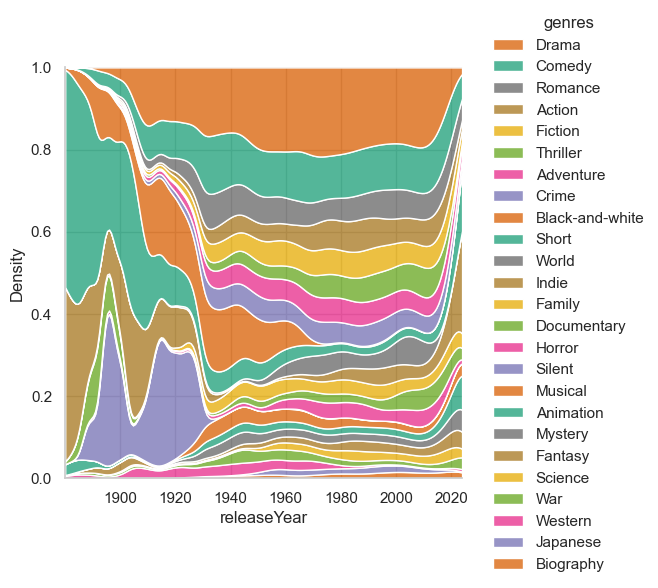

In [90]:
palette = sns.color_palette("Dark2", n_colors=len(data['genres'].unique()))
palette.reverse()
sns.displot(
    data,
    x="releaseYear",
    hue="genres",
    kind="kde",
    multiple="fill",
    hue_order=movies.genres.explode().dropna().value_counts().index.tolist(),
    palette=palette
)

In [40]:
from sklearn.cluster import KMeans,DBSCAN

In [41]:
X = final_grouped_genre_dummies.to_numpy()

In [42]:
kmeans = DBSCAN(eps=0.1, min_samples=10)
kmeans.fit(X)

DBSCAN(eps=0.1, min_samples=10)

In [43]:
labels = kmeans.labels_
set(labels)

{-1, 0, 1}

In [44]:
kmeans.get_params()

{'algorithm': 'auto',
 'eps': 0.1,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 10,
 'n_jobs': None,
 'p': None}

In [45]:
a = []
for l in np.unique(labels):
    a.append(X[labels==l].mean(axis=0))

In [46]:
b = np.array(a)

<Axes: >

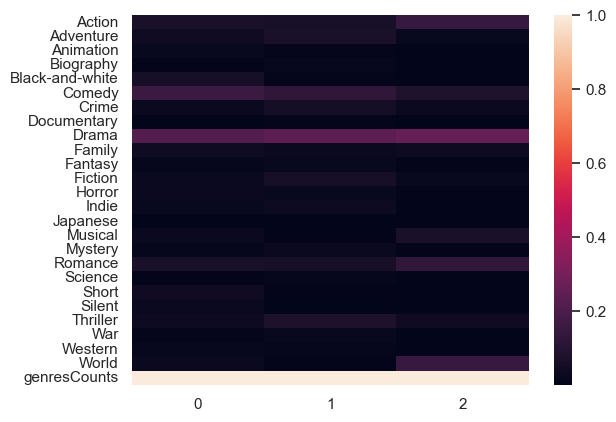

In [47]:
sns.heatmap(b.T, yticklabels=final_grouped_genre_dummies.columns)

In [48]:
sns.heatmap(kmeans.cluster_centers_.T, yticklabels=final_grouped_genre_dummies.columns,)

AttributeError: 'DBSCAN' object has no attribute 'cluster_centers_'

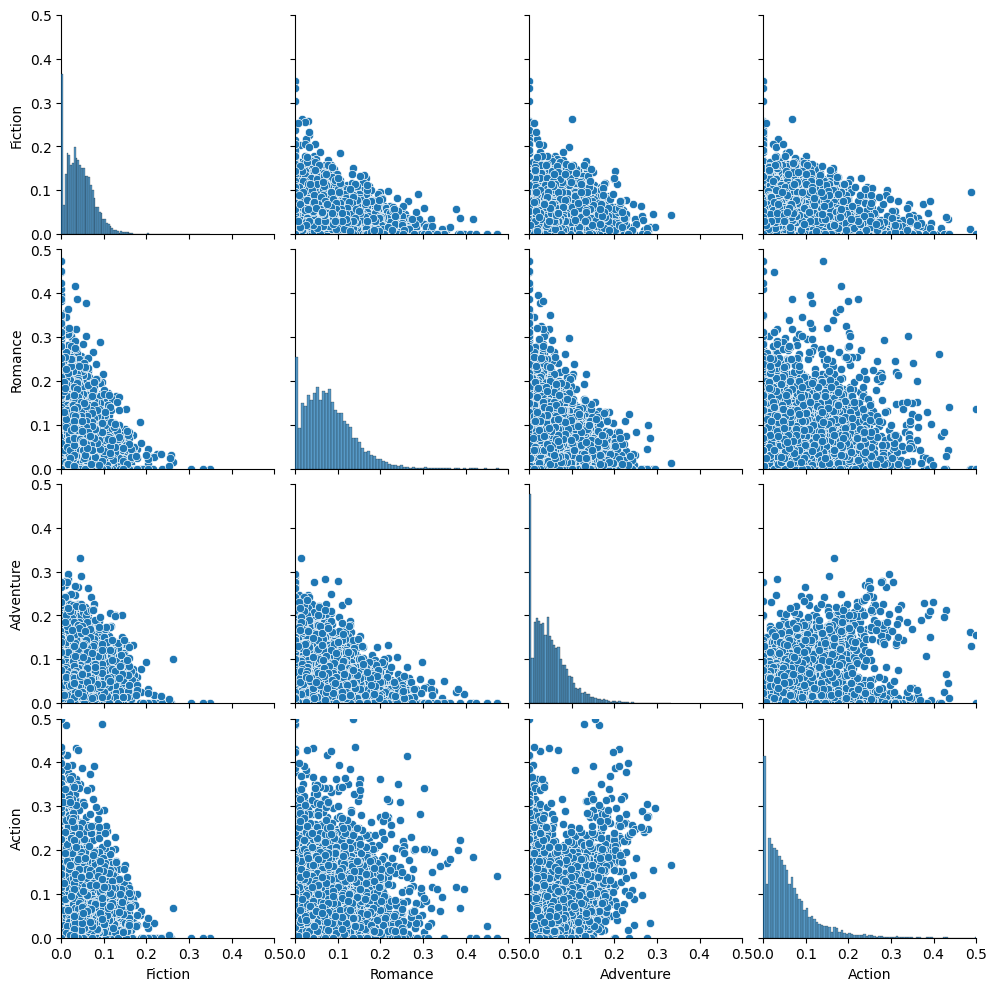

In [ ]:
pairplot = sns.pairplot(
    final_grouped_genre_dummies[["Fiction", "Romance", "Adventure", "Action"]],
)
pairplot.set(ylim=[0,0.5], xlim=[0,0.5])

In [ ]:
# Merge actors_genres with movies dataset, explode the genres column
merged_actors_genres = actors_exploded.merge(movies[["fbID", "genres"]], how="left", on="fbID")
exploded_actors_genres = merged_actors_genres[["fbActorID", "fbID", "genres"]].explode(column="genres")

# Create dummy variables for genres and group and sum 
genre_dummies = pd.get_dummies(exploded_actors_genres, columns=["genres"], prefix="", prefix_sep="")
grouped_genre_dummies = (1 * genre_dummies).groupby(["fbActorID", "fbID"]).sum()

# Calculate the sum of genres for each actor and movie
grouped_genre_dummies["genresCounts"] = grouped_genre_dummies[genres_list].sum(axis="columns")

# Normalize by dividing by the total count of genres
normalized_genre_dummies = grouped_genre_dummies.div(grouped_genre_dummies["genresCounts"], axis=0)

# Group by fbActorID and sum again
grouped_normalized_genre_dummies = normalized_genre_dummies.groupby("fbActorID").sum()

# Filter actors with at least 100 genresCounts
filtered_genre_dummies = grouped_normalized_genre_dummies.query("genresCounts >= 50")

# Normalize again after filtering
final_genre_dummies = filtered_genre_dummies.div(filtered_genre_dummies["genresCounts"], axis=0)

# Group by fbActorID and sum again
final_grouped_genre_dummies = final_genre_dummies.groupby("fbActorID").sum()

In [ ]:
combinedGenres = movies_imdb.genresImdb.apply(
    lambda x: x if isinstance(x, list) else []
) + movies_imdb.genresCmu.apply(lambda x: x if isinstance(x, list) else [])

combinedGenres = combinedGenres.apply(lambda x: set(x) if len(x)>0 else np.nan)

movies_imdb["combinedGenres"]= combinedGenres

In [ ]:
genres = movies_imdb.dropna(subset="combinedGenres").explode(column="combinedGenres").combinedGenres.values
genres_unique = np.unique(genres)


In [ ]:
genres_str = " ".join(str(g) for g in genres)

In [ ]:
split_characters = set()
for m in genres_str:
    for l in m:
        if not l.isalpha() and l != " ":
            split_characters.add(l)

split_characters

{'&', "'", '-', '/', '5', '9', '[', ']'}

In [ ]:
string = genres_str
for delimiter in split_characters:
    string = " ".join(string.split(delimiter))
    
words = string.split(" ")

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

words = list(map(lambda x: x.lower(), words)) #tout en minuscule
words = list(map(lambda x:lemmatizer.lemmatize(x), words)) #enlever les s
ags = nltk.pos_tag(words) # dire si c'est un verbe adjectif etc
words_, tags= np.array(list(map(list, zip(*ags))))

In [ ]:
mask = (tags == np.array(["NN","NNS","NNP","NNPS","JJ"]).reshape(-1,1)).any(axis=0) # grader que les nouns et les adjs


In [ ]:
counts = pd.Series(words_[mask]).value_counts()
themes = pd.Series(counts[counts > 2000]).index
themes 

Index(['drama', 'film', 'comedy', 'action', 'romance', 'thriller', 'crime',
       'adventure', 'fiction', 'short', 'black', 'white', 'family', 'cinema',
       'world', 'movie', 'indie', 'horror', 'romantic', 'documentary',
       'silent', 'musical', 'fantasy', 'animation', 'mystery', 'war', '',
       'science', 'western', 'japanese', 'biography'],
      dtype='object')

In [ ]:
themes = list(themes)
to_remove = [
    "", #remove null caracter 
    "film",
    "cinema",
    "movie",  # comes from genres like "Romance Film" not a genre in itself.
    "black",
    "white",  # will add "black-and-white" instead of having both
    "science", # only science fiction contained in fiction
]
for r in to_remove:
    themes.remove(r)
themes.append("black-and-white")
themes = list(map(lambda x:x.capitalize(), themes))

In [ ]:
genres_dict = {theme: set() for theme in themes}
for theme in themes:
    for genre in genres_unique:
        if theme.lower() in genre.lower():
            genres_dict[theme].add(genre)


genres_dict["Romance"]= genres_dict["Romance"].union(genres_dict.pop("Romantic"));
themes.remove("Romantic")

print(len(themes) ,"themes :",themes)

24 themes : ['Drama', 'Comedy', 'Action', 'Romance', 'Thriller', 'Crime', 'Adventure', 'Fiction', 'Short', 'Family', 'World', 'Indie', 'Horror', 'Documentary', 'Silent', 'Musical', 'Fantasy', 'Animation', 'Mystery', 'War', 'Western', 'Japanese', 'Biography', 'Black-and-white']


In [ ]:
genres_dict["Drama"]

{'Addiction Drama',
 'Childhood Drama',
 'Comedy-drama',
 'Costume drama',
 'Courtroom Drama',
 'Crime Drama',
 'Docudrama',
 'Drama',
 'Erotic Drama',
 'Family Drama',
 'Fantasy Drama',
 'Historical drama',
 'Inspirational Drama',
 'Legal drama',
 'Marriage Drama',
 'Melodrama',
 'Musical Drama',
 'Political drama',
 'Romantic drama'}

In [ ]:
def unify_genres(x):
    try:
        unified_genres = set()
        for genre in x:
            themes_in_genres = {t for t in themes if genre in genres_dict[t]}
            unified_genres= unified_genres.union(themes_in_genres)
        return unified_genres if unified_genres else np.nan

    except TypeError: 
        return x
        

In [ ]:
genres_final = movies_imdb.combinedGenres.apply(unify_genres)
(genres_final.isnull()).sum()

3339

In [ ]:
movies_imdb["unifiedGenres"] = movies_imdb.combinedGenres.apply(unify_genres)

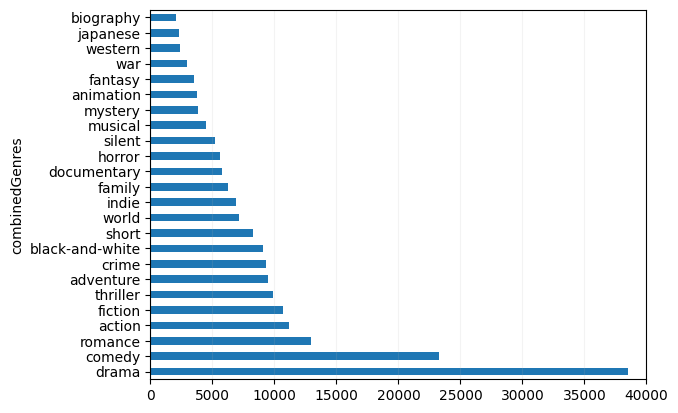

In [ ]:
genres_final.explode().value_counts().plot(kind='barh')
plt.xlim([0,4e4])
plt.grid(alpha=0.15, axis="x")

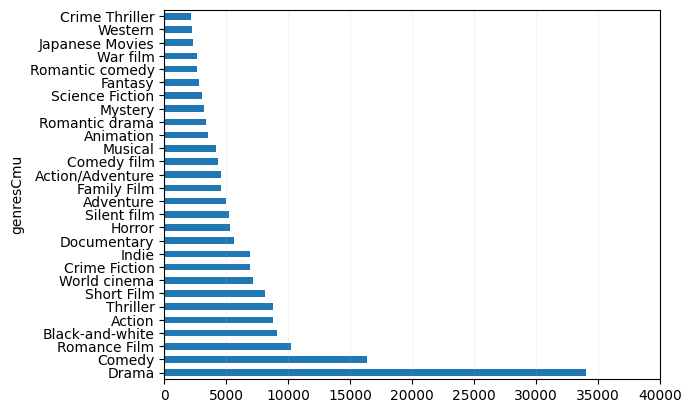

In [ ]:
occurences = movies_imdb.genresCmu.explode().value_counts()
occurences[occurences>2000].plot(kind='barh')
plt.xlim([0,4e4])
plt.grid(alpha=0.15, axis="x")

In [ ]:
movies_imdb.unifiedGenres

0                                  {Mystery, Drama, Crime}
1                                  {Drama, Fiction, Crime}
2                                               {Thriller}
3                                                  {Drama}
4          {Silent, Comedy, Black-and-white, Indie, Short}
                               ...                        
81625                                              {Drama}
81626                                 {Drama, Documentary}
81627                                             {Comedy}
81628    {Adventure, Animation, Drama, Japanese, Fictio...
81629                                   {Thriller, Horror}
Name: unifiedGenres, Length: 81630, dtype: object

In [ ]:
movies_imdb.drop("combinedGenres",inplace=True, axis=1)

In [ ]:
movies_imdb

,wikiID,fbID,name,boxOffice,runtime,languages,countries,genresCmu,releaseMonth,releaseYear,imdbID,titleType,originalTitle,isAdult,endYear,genresImdb,averageRating,numVotes,budget,popularity,unifiedGenres
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{Mystery, Drama, Crime}"
1,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",NaN,1988.0,tt0094806,movie,Brun bitter,0.0,\N,"[Crime, Drama]",5.6,40.0,NaN,NaN,"{Drama, Fiction, Crime}"
2,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",NaN,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{Thriller}
3,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,[German Language],[Germany],[Drama],NaN,1983.0,tt0083949,movie,Die flambierte Frau,0.0,\N,[Drama],6.0,621.0,NaN,NaN,{Drama}
4,13696889,/m/03cfc81,The Gangsters,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi...",5.0,1913.0,tt0002894,short,The Gangsters,0.0,\N,"[Comedy, Short]",6.8,16.0,NaN,NaN,"{Silent, Comedy, Black-and-white, Indie, Short}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81625,35228177,/m/0j7hxnt,Mermaids: The Body Found,NaN,120.0,[English Language],[United States of America],[Drama],3.0,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{Drama}
81626,34980460,/m/0g4pl34,Knuckle,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",1.0,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{Drama, Documentary}"
81627,9971909,/m/02pygw1,Another Nice Mess,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]",9.0,1972.0,tt0362411,movie,Another Nice Mess,0.0,\N,[Comedy],5.8,110.0,NaN,NaN,{Comedy}
81628,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",5.0,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{Adventure, Animation, Drama, Japanese, Fictio..."


In [ ]:
# save preprocessed dataframe to csv
movies_imdb.to_csv(DATA_FOLDER + "movies_imdb.csv", index=False)

In [ ]:
movies_imdb = pd.read_csv(DATA_FOLDER + 'movies_imdb.csv',
                          converters={'languages': parse_list, 'countries': parse_list, 'genresCmu': parse_list,
                                      'genresImdb': parse_list, 'unifiedGenres': parse_list})

In [ ]:
movies_imdb.unifiedGenres.explode().unique()

array(['Mystery', 'Drama', 'Crime', 'Fiction', 'Thriller',
       'Black-and-white', 'Silent', 'Comedy', 'Indie', 'Short',
       'Adventure', 'World', 'Fantasy', 'Family', 'Musical', 'Horror',
       'Romance', 'Japanese', 'Action', 'Biography', 'War', 'Animation',
       nan, 'Western', 'Documentary'], dtype=object)